# Accessing UKESM, CESM all ensemble members from CEDA archives 

This notebook accesses all UKESM and CESM ensmeble members for temperature and precipitation to assess the model internal variability source of uncertainty in IHTD and TPC.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cftime
from xmip.preprocessing import rename_cmip6
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy as sp
import pandas as pd

In [3]:
# CESM

ens_mems_i = []

for x in os.listdir('/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2-WACCM/historical'):
    if not '.' in x:
        ens_mems_i.append(x)
ens_mems = []

for x in ens_mems_i:
    if x in os.listdir('/badc/cmip6/data/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp245/'):
        ens_mems.append(x)
print(ens_mems_i, '\n' , ens_mems)

# make DS

def get_ds(scenario, variable, table='Amon', grid='gn'):
    ds_list = []
    for es in ens_mems:
        path = '/badc/cmip6/data/CMIP6/*MIP/NCAR/CESM2-WACCM/{s}/{e}/{t}/{v}/{g}/latest/'.format(s=scenario, e=es, t=table,v=variable, g=grid)
        #files = os.listdir(path)
        ds = rename_cmip6(xr.open_mfdataset(path+'*.nc'))
        ds_list.append(ds)
    
    DS = xr.concat(ds_list, dim='Ensemble_member')
    return DS

DS_tas_CESM_s245 = get_ds(scenario='ssp245', variable='tas', table='Amon')
DS_tas_CESM_hist = get_ds(scenario='historical', variable='tas', table='Amon')

DS_pr_CESM_s245 = get_ds(scenario='ssp245', variable='pr', table='Amon')
DS_pr_CESM_hist = get_ds(scenario='historical', variable='pr', table='Amon')

DS_pr_CESM =  xr.concat([DS_pr_CESM_s245, DS_pr_CESM_hist], dim='time')
DS_tas_CESM =  xr.concat([DS_tas_CESM_s245, DS_tas_CESM_hist], dim='time')

['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'] 
 ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']


/home/users/nanaokan/.conda/envs/cmipv2/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/home/users/nanaokan/.conda/envs/cmipv2/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/home/users/nanaokan/.conda/envs/cmipv2/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/home/users/nanaokan/.conda/envs/cmipv2/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/home/users/

In [22]:
# UKESM 

ens_mems_i = []

for x in os.listdir('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical'):
    if not '.' in x:
        ens_mems_i.append(x)
ens_mems = []

for x in ens_mems_i:
    if x in os.listdir('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/'):
        ens_mems.append(x)
print(ens_mems_i, '\n' , ens_mems)

# make DS

def get_ds(scenario, variable, table='Amon', grid='gn'):
    ds_list = []
    for es in ens_mems:
        path = '/badc/cmip6/data/CMIP6/*MIP/MOHC/UKESM1-0-LL/{s}/{e}/{t}/{v}/{g}/latest/'.format(s=scenario, e=es, t=table,v=variable, g=grid)
        ds = rename_cmip6(xr.open_mfdataset(path+'*.nc'))
        ds_list.append(ds)
    DS = xr.concat(ds_list, dim='Ensemble_member')
    return DS
    
DS_tas_UKESM_s245 = get_ds(scenario='ssp245', variable='tas', table='Amon')
DS_tas_UKESM_hist = get_ds(scenario='historical', variable='tas', table='Amon')

DS_pr_UKESM_s245 = get_ds(scenario='ssp245', variable='pr', table='Amon')
DS_pr_UKESM_hist = get_ds(scenario='historical', variable='pr', table='Amon')

DS_pr_UKESM =  xr.concat([DS_pr_UKESM_hist, DS_pr_UKESM_s245], dim='time')
DS_tas_UKESM =  xr.concat([DS_tas_UKESM_hist, DS_tas_UKESM_s245], dim='time')
'''
DS_pr_UKESM_list = []
DS_tas_UKESM_list = []
for i in range(len(DS_tas_UKESM_s245)):
    DS_pr_UKESM =  xr.concat([DS_pr_UKESM_hist[i], DS_pr_UKESM_s245[i]], dim='time')
    DS_tas_UKESM =  xr.concat([DS_tas_UKESM_hist[i], DS_tas_UKESM_s245[i]], dim='time')
    DS_pr_UKESM_list.append(DS_pr_UKESM)
    DS_tas_UKESM_list.append(DS_tas_UKESM)
'''

['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f3', 'r6i1p1f3', 'r7i1p1f3', 'r8i1p1f2', 'r9i1p1f2'] 
 ['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r8i1p1f2', 'r9i1p1f2']


"\nDS_pr_UKESM_list = []\nDS_tas_UKESM_list = []\nfor i in range(len(DS_tas_UKESM_s245)):\n    DS_pr_UKESM =  xr.concat([DS_pr_UKESM_hist[i], DS_pr_UKESM_s245[i]], dim='time')\n    DS_tas_UKESM =  xr.concat([DS_tas_UKESM_hist[i], DS_tas_UKESM_s245[i]], dim='time')\n    DS_pr_UKESM_list.append(DS_pr_UKESM)\n    DS_tas_UKESM_list.append(DS_tas_UKESM)\n"

In [ ]:
def get_TPC(da_pr):
    """ 
    - Global returns 10yr avg of global precip for each lon-lat point
    - Tropical returns 10yr avg of tropical precip for each lon-lat point 
    - TPC returns the latitude defining two regions of equal area-integrated 
    precipitation between two tropical latitude boundaries, 10 yr avg 
    """
    
    # global
    pr_yr_glob = da_pr.groupby('time.year').mean('time')
    pr_10_glob = pr_yr_glob.rolling(year=10, center=True).mean().dropna("year")
 #   pr_10_glob_mean = pr_10_glob.mean(dim = ['x', 'y'])

    #tropical
    da_pr_trop = da_pr.sel(y=slice(-20, 20))
    pr_yr_trop = da_pr_trop.groupby('time.year').mean('time')
    pr_10_trop = pr_yr_trop.rolling(year=10, center=True).mean().dropna("year")
  #  pr_10_trop_mean = pr_10_trop.mean(dim = ['x','y'])

    #centroid
    weights = np.cos(np.deg2rad(np.asarray(da_pr_trop.y)))
    da_pr_zonal = pr_yr_trop.mean(dim='x')
    da_pr_zonal_weighted = da_pr_zonal.pr*weights
    pr_weighted_lats = da_pr_trop.y.weighted(da_pr_zonal_weighted)
    cr = pr_weighted_lats.mean(dim='y')
 #   cr_yr = cr.groupby('time.year').mean('time')
    cr_10 = cr.rolling(year=10, center=True).mean().dropna("year")
    
    return pr_10_glob, pr_10_trop, cr_10


glob_UKESM, trop_UKESM, cr_UKESM = get_TPC(DS_pr_UKESM)
glob_CESM, trop_CESM, cr_CESM = get_TPC(DS_pr_CESM)

def get_ITD_multi(da_tas): 
    weights = np.cos(np.deg2rad(da_tas.y))
    NH = da_tas.sel(y=slice(0, 90)).weighted(weights).mean(dim=['x', 'y'])
    SH = da_tas.sel(y=slice(-90, 0)).weighted(weights).mean(dim=['x', 'y'])
    ITD = NH-SH
    NH = NH.groupby('time.year').mean('time')
    SH = SH.groupby('time.year').mean('time')
    ITD = ITD.groupby('time.year').mean('time')
    GMT = (NH+SH)/2
#    pattern = da_tas.groupby('time.year').mean('time')
    return ITD, NH,SH,GMT# pattern


itd_UKESM, NH_UKESM, SH_UKESM, GMT_UKESM = get_ITD_multi(DS_tas_UKESM.tas)
itd_CESM, NH_CESM, SH_CESM, GMT_CESM = get_ITD_multi(DS_tas_CESM.tas)

datasets = {
    'itd_UKESM': itd_UKESM, 
#    'NH_UKESM': NH_UKESM, 
#    'SH_UKESM': SH_UKESM, 
 #   'GMT_UKESM': GMT_UKESM,
    'itd_CESM': itd_CESM, 
#    'NH_CESM': NH_CESM, 
 #   'SH_CESM': SH_CESM, 
  #  'GMT_CESM': GMT_CESM,
   # 'glob_UKESM': glob_UKESM, 
    #'trop_UKESM': trop_UKESM, 
    'cr_UKESM': cr_UKESM, 
    #'glob_CESM': glob_CESM,
    #'trop_CESM': trop_CESM, 
    'cr_CESM': cr_CESM
}


for name, data_array in datasets.items():
    data_array.to_netcdf(f"EnsMembers/{name}.nc")


In [22]:
itd_UKESM[:,:50].mean(dim = 'year')

<xarray.DataArray 'tas' (Ensemble_member: 13)> Size: 104B
array([0.97310451, 1.03166335, 1.0400159 , 1.04539523, 1.24671843,
       1.27368417, 1.01326302, 1.15457041, 1.01245728, 1.09660714,
       1.19370923, 0.97923492, 1.03387792])
Coordinates:
    height   float64 8B ...
Dimensions without coordinates: Ensemble_member

In [42]:
ds_list = []
for i in os.listdir('EnsMembers/'):
    file = xr.open_dataarray(f'EnsMembers/{i}')
    ds_list.append(file)

itd_UKESM = ds_list[0]
itd_CESM = ds_list[1]
tpc_UKESM = ds_list[2]
tpc_CESM = ds_list[3]

itd_UKESM_pi = itd_UKESM[:,:50].mean(dim = 'year')     # very annoyingly itd and tpc have swapped EnsMem and year
itd_CESM_pi = itd_CESM[:,:50].mean(dim = 'year')
tpc_UKESM_pi = tpc_UKESM[:50,:].mean(dim = 'year')
tpc_CESM_pi = tpc_CESM[:50,:].mean(dim = 'year')

itd_UKESM_post = itd_UKESM[:,-50:].mean(dim = 'year')
itd_CESM_post = itd_CESM[:,-50:].mean(dim = 'year')
tpc_UKESM_post = tpc_UKESM[-50:,:].mean(dim = 'year')
tpc_CESM_post = tpc_CESM[-50:,:].mean(dim = 'year')

In [43]:
itd_pi_min_UKESM = float((itd_UKESM_post - itd_UKESM_pi).min().round(3))
itd_pi_max_UKESM = float((itd_UKESM_post - itd_UKESM_pi).max().round(3))

itd_pi_min_CESM = float((itd_CESM_post - itd_CESM_pi).min().round(3))
itd_pi_max_CESM = float((itd_CESM_post - itd_CESM_pi).max().round(3))

tpc_pi_min_UKESM = float((tpc_UKESM_post - tpc_UKESM_pi).min().round(3))
tpc_pi_max_UKESM = float((tpc_UKESM_post - tpc_UKESM_pi).max().round(3))

tpc_pi_min_CESM = float((tpc_CESM_post - tpc_CESM_pi).min().round(3))
tpc_pi_max_CESM = float((tpc_CESM_post - tpc_CESM_pi).max().round(3))

In [1]:
# these are used for error bars in the multi model IHTD-TPC plot

print(f'UKESM itd min is: {itd_pi_min_UKESM} \n UKESM itd max is: {itd_pi_max_UKESM}')
print(f'CESM itd min is: {itd_pi_min_CESM} \n CESM itd max is: {itd_pi_max_CESM}')
print(f'UKESM tpc min is: {tpc_pi_min_UKESM} \n UKESM tpc max is: {tpc_pi_max_UKESM}')
print(f'CESM tpc min is: {tpc_pi_min_CESM} \n CESM tpc max is: {tpc_pi_max_CESM}')

NameError: name 'itd_pi_min_UKESM' is not defined

/tmp/ipykernel_583/3644974899.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


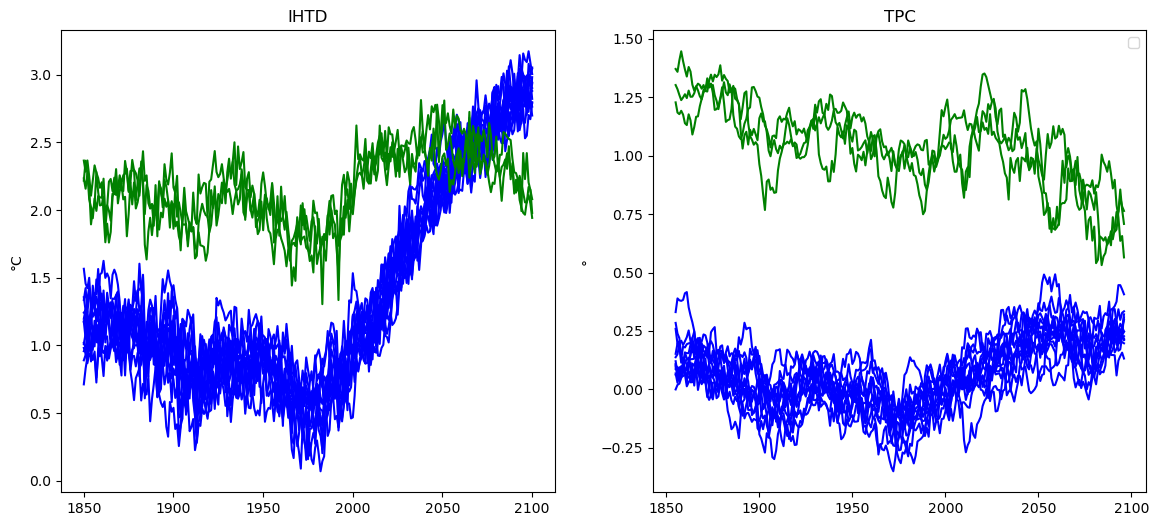

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax = axs[0]

for es in range(len(itd_UKESM.Ensemble_member)):
    d = itd_UKESM.isel(Ensemble_member=es)
    ax.plot(d.year, d, color = 'blue', label = 'UKESM')
    ax.set_title('IHTD')
    ax.set_ylabel('°C')

for es in range(len(itd_CESM.Ensemble_member)):
    d = itd_CESM.isel(Ensemble_member=es)
    ax.plot(d.year, d, color = 'green', label = 'CESM')
    ax.set_title('IHTD')
    ax.set_ylabel('°C')
plt.legend()

ax = axs[1]

for es in range(len(tpc_UKESM.Ensemble_member)):
    d = tpc_UKESM.isel(Ensemble_member=es)
    ax.plot(d.year, d, color = 'blue', label = 'UKESM')
    ax.set_title('TPC')
    ax.set_ylabel('°')

for es in range(len(tpc_CESM.Ensemble_member)):
    d = tpc_CESM.isel(Ensemble_member=es)
    ax.plot(d.year, d, color = 'green', label = 'CESM')
    ax.set_title('TPC')
    ax.set_ylabel('°')

#plt.legend()